# `Applied Machine Learning`

## `Lab 3. Gradient Descent`

The parameter values at the next step are obtained from the parameter values at the previous step by shifting towards the negative gradient of the loss function:

$$w^{k+1} = w^{k} - \eta_k \nabla_{w^{k}} L(w, X) \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; (1),$$
where $\eta_t$ is a learning rate.

For instance for linear model with MSE loss:

$$
L(w, X) = \frac{1}{\ell}(Xw - y)^T(Xw - y)
$$
$$
\Delta = \nabla_w L(w, X) = \frac{2}{\ell}X^T(Xw - y) \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; (2)
$$

### Asymptotic computational complexity

__Gradient descent__    
The calculation of $\nabla_w L(w, X)$ consists of several matrix by vector multiplications, which usually requires $O(\ell d)$ operations.

__Stochastic gradient descent__    
We can take a random subsample of $k \ll \ell$ object and approximate gradient with them. This will reduce the computational complexity to $O(k d)$.

# what are we doing here
-we are learning how to teach computer to make better guesses using a method called Gradient Descent. we are teaching computer to find patterens in the data and gets better over time.

### Visualization of GD and SGD trajectories

Let's generate synthetic data and add random noise to the targets.

In [87]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# This module allows to automatically draw all images in vector format 
#   to increase their readability
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

np.random.seed(100)

# making data
Think of this as trying to predict someone’s weight based on their height—except here, we have two features instead of one.

data pattern: Y= Xw + noise
X is feature. imaging like height and age.
w (weight): is like how much height and age affect weight.
Y (target): is likeactual weight
noise is added to make data realistic

In [88]:
n_features = 2 # 2 feature. height and age
n_objects = 300 #300 data points. 300ppl

rng = np.random.default_rng(100)
w_true = rng.normal(size=(n_features,)) # generate random weight. this represents real relationship between features and target

X = rng.uniform(-5, 5, (n_objects, n_features)) # create a 300x2 matrix with values between -5 and 5
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]  # for different scales to make learning harder

Y = X.dot(w_true) + rng.normal(0, 1, (n_objects))#simulate a linear model with some noise

w_0 = rng.uniform(-1, 1, (n_features)) # starting point of gradient descnet

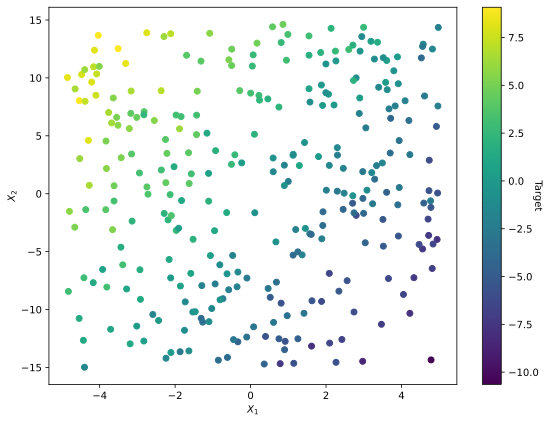

In [89]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sc = ax.scatter(X[:, 0], X[:, 1], c=Y)
ax.set_xlabel(r'$X_{1}$')
ax.set_ylabel(r'$X_{2}$')

cbar = plt.colorbar(sc)
cbar.set_label('Target', rotation=270)

fig.tight_layout()
plt.show()

Set the hyperparameters for gradient descent:

In [90]:
batch_size = 10
num_steps = 50

<font color='brown'>**Exercise 1.** Implement Gradient descent for linear regression:</font>

In [91]:
X.shape[0]

300

In [92]:
# we are caculating how far off our current prediction is.
# tehn update teh weights using teh GD formula
def gd(w_0, learning_rate=1e-2):
    w = w_0.copy() #make copy of weight vector initialized earlier
    w_list = [w.copy()] #store in w_list to track  

    for i in range(num_steps):
        # Compute Delta via Equation (2)
        Delta = (2/ X.shape[0])*np.dot(X.T, np.dot(X, w)-Y)
        # Perform Gradient Descent via Equation (1)
        w -= Delta*learning_rate
        
        # Save intermediate points
        w_list.append(w.copy())

    return np.array(w_list)

In [93]:
np.random.seed(100)
w_list = gd(w_0=w_0, learning_rate=1e-2)
assert np.linalg.norm(np.sum(w_list, axis=0) - [-47.8,  14.5]) < 0.1

Here some additional functions for visualization:

In [94]:
import plotly.graph_objects as go


def compute_limits(w_list):
    dx = np.max(np.abs(w_list[:, 0] - w_true[0])) * 1.1
    dy = np.max(np.abs(w_list[:, 1] - w_true[1])) * 1.1
    
    return (w_true[0] - dx, w_true[0] + dx), (w_true[1] - dy, w_true[1] + dy)


def compute_levels(w_list, x_range, y_range, num: int = 100):
    x, y = np.linspace(x_range[0], x_range[1], num), np.linspace(y_range[0], y_range[1], num)
    A, B = np.meshgrid(x, y)

    levels = np.empty_like(A)

    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = np.mean(np.power(np.dot(X, w_tmp) - Y, 2))
            
    return x, y, levels


def make_contour(x, y, levels, name: str=None):
    return go.Contour(
        x=x,
        y=y,
        z=levels,
        contours_coloring='lines',
        line_smoothing=1,
        line_width=2,
        ncontours=100,
        opacity=0.5,
        name=name
    )


def make_arrow(figure, x, y):
    x, dx = x
    y, dy = y
    
    figure.add_annotation(
        x=x,
        y=y,
        ax=x + dx,
        ay=y + dy,
        xref='x',
        yref='y',
        text='',
        showarrow=True,
        axref = 'x',
        ayref='y',
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
    )


def plot_trajectory(w_list, name):
    # compute limits
    x_range, y_range = compute_limits(w_list)
    
    # compute level set
    x, y, levels = compute_levels(w_list, x_range, y_range)
    
    # plot levels
    contour = make_contour(x, y, levels, 'Loss function levels')

    # plot weights
    w_path = go.Scatter(
        x=w_list[:, 0][:-1],
        y=w_list[:, 1][:-1],
        mode='lines+markers',
        name='W',
        marker=dict(size=7, color='red')
    )

    # plot final weight
    w_final = go.Scatter(
        x=[w_list[:, 0][-1]],
        y=[w_list[:, 1][-1]],
        mode='markers',
        name='W_final',
        marker=dict(size=10, color='black'),
    )
    
    # plot true optimum    
    w_true_point = go.Scatter(
        x=[w_true[0]],
        y=[w_true[1]],
        mode='markers',
        name='W_true',
        marker=dict(size=10, color='black'),
        marker_symbol='star'
    )
    
    # make the figure
    fig = go.Figure(data=[contour, w_path, w_final, w_true_point])

    fig.update_xaxes(type='linear', range=x_range)
    fig.update_yaxes(type='linear', range=y_range)

    fig.update_layout(title=name)

    fig.update_layout(
        autosize=True,
        width=700,
        margin=dict(
            l=50,
            r=50,
            b=50,
            t=100,
            pad=4
        ),
        paper_bgcolor='LightSteelBlue',
    )

    fig.update_layout(legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ))

    fig.update_traces(showlegend=True)

    fig.show()

In [95]:
plot_trajectory(w_list, 'Gradient descent')

Gradient is orthogonal to contour lines of the loss functions. It's easy to see from the fact, that function value doesn't change along a contour line and gradient shows the direction of fastest growth.

Let's compare GD to the Stochastic gradient descent:

<font color='brown'>**Exercise 2.** Implement Stochastic Gradient descent for linear regression:</font>

In [96]:
def calc_grad_on_batch(X, Y, w, batch_size):
    # Take a random subsample of indices. Use numpy to generate indices

    sample = np.random.choice(X.shape[0], batch_size, replace=False)
    # Compute gradient for obtained sample
    X_batch =X[sample]
    Y_batch =Y[sample]
    Delta = (2/batch_size)*np.dot(X_batch.T,np.dot(X_batch, w)-Y_batch)
    return Delta

#inner np.dot(X_batch, w)-Y_batch : the np.dot predict Y value using weigths w
# -Y to see how far off are we

In [97]:
n = 1000
grad = 0
for i in range(n):
    grad += calc_grad_on_batch(X, Y, w_0, batch_size=100)
grad /= n

assert np.linalg.norm(grad - [21.82, -109.47]) < 1

In [98]:
learning_rate = 1e-2

w = w_0.copy() # w is like current improving technique, w_0.copy is like first guess
w_list = [w.copy()] #make list to track progress

for i in range(num_steps): #num_steps is like how many tries we will run and each time we will adjust based on feedback
    w -= learning_rate * calc_grad_on_batch(X, Y, w, batch_size) #the function tells how much we should adjust. the learning rate tells how big or small each adjustment should be
    w_list.append(w.copy()) #save each result to see how it gets progress over time

w_list = np.array(w_list)

In [99]:
plot_trajectory(w_list, 'Stochastic gradient descent')

Looks like we forgot about Robbins-Monro conditions for SGD convergence:
$$
\sum_{k = 1}^\infty \eta_k = \infty, \qquad \sum_{k = 1}^\infty \eta_k^2 < \infty.
$$

Let's take $\eta_k = \frac{\eta_0}{k}$.

In [100]:
learning_rate_0 = 0.01

w = w_0.copy()
w_list = [w.copy()]

for i in range(num_steps):
    learning_rate = learning_rate_0 / (i+1) #learning rate gets smaller over time. this is to assume that at first the model is far from good and need huge adjustment but as it gets better, we need less and less adjustment
    w -= learning_rate * calc_grad_on_batch(X, Y, w, batch_size)
    w_list.append(w.copy())

w_list = np.array(w_list)

In [101]:
plot_trajectory(w_list, 'Stochastic gradient descent with dynamic learning rate')

This learning rate scheduler is too aggressive. Let's take scheduler with less rapid decrease.
$$
\eta_t = \lambda \left(\frac{s_0}{s_0 + t}\right)^p.
$$
We will set $s_0 = 1$ and try different $\lambda$ and $p$.

In [102]:
#similar to last technique, but more advance
#the diff here is that the rate of change is more gradual
#lambda_param is how fast learning rate is reduce
#p is how aggressive we shrink
#s_init is initial scaling factor for rate
def sgd_with_lr_schedule(lambda_param, p=0.5, s_init=1.0, batch_size=10):
    w = w_0.copy()
    w_list = [w.copy()]

    for i in range(num_steps):
        learning_rate = lambda_param * (s_init / (s_init + i))**p
        w -= learning_rate * calc_grad_on_batch(X, Y, w, batch_size)
        w_list.append(w.copy())

    return np.array(w_list)

In [103]:
w_list = sgd_with_lr_schedule(lambda_param=0.01, p=0.8)
plot_trajectory(w_list, 'SGD with learning rate schedule')

In [104]:
w_list = sgd_with_lr_schedule(lambda_param=0.01, p=0.5)



plot_trajectory(w_list, 'SGD with learning rate schedule')


In [105]:
w_list = sgd_with_lr_schedule(lambda_param=0.01, p=0.35)
plot_trajectory(w_list, 'SGD with learning rate schedule')

In [106]:
w_list = sgd_with_lr_schedule(lambda_param=0.013, p=0.35)
plot_trajectory(w_list, 'SGD with learning rate schedule')

As you can see, SGD is very sensitive to small changes in learning rate.

Let's try to change batch size now.

In [107]:
w_list = sgd_with_lr_schedule(lambda_param=0.013, p=0.35, batch_size=1)
plot_trajectory(w_list, 'SGD with learning rate schedule')

In [108]:
w_list = sgd_with_lr_schedule(lambda_param=0.013, p=0.35, batch_size=10)
plot_trajectory(w_list, 'SGD with learning rate schedule')

In [109]:
w_list = sgd_with_lr_schedule(lambda_param=0.013, p=0.35, batch_size=100)
plot_trajectory(w_list, 'SGD with learning rate schedule')

The larger the batch size, the more stable SGD.

### Momentum

As we can see, for small batch sizes optimization procedure might be unstable.  To solve this problem, an approach has been proposed that increases the range step to a minimum and reduces oscillation. This concerns the fact that the change in parameters at the next step is calculated as the weighted changes at the next step and the gradient loss function at the current step. Denoting the loss of gradient functions at step $i$
: $g^{i} = \nabla_{w}L(w^{i})$

$$
\Delta^{i} = \beta \Delta^{i - 1} + \nabla L = \sum\limits_{k=0}^{i}\beta^{i-k}g^{k} \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; (3)
$$

$$
w^{i + 1} = w^{i} - \eta_{i}\Delta^{i}
$$

The speed of movement in the direction of the minimum increases (since this direction is present in all gradients), and the oscillation is damped. The weighting parameter $\gamma$ is usually chosen to be 0.9 or close to that.

<font color='brown'>**Exercise 3.** Implement Momentum SGD:</font>

In [110]:
def sgd_with_lr_schedule_and_momentum(w_0, lambda_param, p=0.5, s_init=1.0, batch_size=10, beta=0.9):
    w = w_0.copy()
    w_list = [w.copy()]
    Delta = np.zeros(w.shape)

    for i in range(num_steps):
        ### Update Delta via Equation (3)
        Grad = calc_grad_on_batch(X, Y, w, batch_size)
        Delta = (beta * Delta) + Grad
        ### Compute learning rate
        learning_rate = lambda_param * (s_init / (s_init + i))**p
        
        # Update weights
        w -= learning_rate * Delta
        # Add weights to the history
        w_list.append(w.copy())

    return np.array(w_list)

In [112]:
np.random.seed(100)
w_list = sgd_with_lr_schedule_and_momentum(w_0=w_0, lambda_param=0.01, p=0.8, batch_size=10, beta=0)
assert np.linalg.norm(np.sum(w_list, axis=0) - [-20.5,  12.1]) < 0.1

AssertionError: 

In [ ]:
w_list = sgd_with_lr_schedule_and_momentum(w_0=w_0, lambda_param=0.01, p=0.8, batch_size=10, beta=0)
plot_trajectory(w_list, 'SGD with learning rate schedule')

In [ ]:
w_list = sgd_with_lr_schedule_and_momentum(w_0=w_0, lambda_param=0.01, p=0.8, batch_size=10, beta=0.75)
plot_trajectory(w_list, 'SGD with learning rate schedule')

### Convergence speed comparison

Let's create a new bigger dataset

In [ ]:
num_steps = 100
batch_size = 10

In [ ]:
# data generation
n_features = 50
n_objects = 10000

w_true = np.random.uniform(-2, 2, n_features)

X = np.random.uniform(-10, 10, (n_objects, n_features))
Y = X.dot(w_true) + np.random.normal(0, 5, n_objects)

In [ ]:
from scipy.linalg import norm

learning_rate_sgd = 1e-2
learning_rate_gd = 1e-2

w_sgd = np.random.uniform(-1, 1, n_features)
w_gd = w_sgd.copy()

residuals_sgd = [np.mean(np.power(np.dot(X, w_sgd) - Y, 2))]
residuals_gd = [np.mean(np.power(np.dot(X, w_gd) - Y, 2))]

for i in range(num_steps):
    # sgd
    learning_rate = learning_rate_sgd / ((i+1) ** 0.4)
    sample = np.random.randint(n_objects, size=batch_size)
    
    w_sgd -= learning_rate * calc_grad_on_batch(X, Y, w_sgd, batch_size)
    residuals_sgd.append(np.mean(np.power(np.dot(X, w_sgd) - Y, 2)))
    
    # gd
    w_gd -= 2 * learning_rate_gd * np.dot(X.T, np.dot(X, w_gd) - Y) / Y.shape[0]
    residuals_gd.append(np.mean(np.power(np.dot(X, w_gd) - Y, 2)))

In [ ]:
full_gd = go.Scatter(x=np.arange(num_steps+1), y=residuals_gd, name='Full GD')
sgd = go.Scatter(x=np.arange(num_steps+1), y=residuals_sgd, name='SGD')

fig = go.Figure(data=[full_gd, sgd])

fig.update_xaxes(type='linear', range=[-1, num_steps + 1])
fig.update_yaxes(type='linear')

fig.update_layout(title = 'Loss comparison', xaxis=dict(title="Iteration"))

fig.update_layout(
    autosize=True,
    width=700,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=100,
        pad=4
    ),
    paper_bgcolor='LightSteelBlue',
)

fig.show()

The learning rate is too big for the first iterations.

Let's look at how much the batch size impacts the convergence.

In [ ]:
learning_rate_sgd = 1e-2
learning_rate_gd = 1e-2
num_steps = 500

w_init = np.random.uniform(-1, 1, n_features)
w_gd = w_init.copy()

for i in range(num_steps):
    w_gd -= 2 * learning_rate_gd * np.dot(X.T, np.dot(X, w_gd) - Y) / Y.shape[0]
    
best_error = np.mean(np.power(np.dot(X, w_gd) - Y, 2))
steps_before_conv = []
batch_sizes = np.arange(0, 500, 10)

for batch_size in batch_sizes:
    w_sgd = w_init.copy()
    for i in range(num_steps):
        learning_rate = learning_rate_sgd / ((i+1) ** 0.4)
        sample = np.random.randint(n_objects, size=batch_size)

        w_sgd -= learning_rate * calc_grad_on_batch(X, Y, w_sgd, batch_size)
        err = np.mean(np.power(np.dot(X, w_sgd) - Y, 2))
        if np.abs(err - best_error) < 1:
            break
        
    steps_before_conv.append(i)

In [ ]:
conv_speed = go.Scatter(x=batch_sizes, y=steps_before_conv, name='Number of steps to convergence')

fig = go.Figure(data=conv_speed)

fig.update_layout(title='Convergence speed',
                 xaxis=dict(title="batch size"),
                yaxis=dict(title="steps before convergence")
)

fig.update_layout(
    autosize=True,
    width=700,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=100,
        pad=4
    ),
    paper_bgcolor='LightSteelBlue',
)

fig.show()

We reach the convergence speed limit around batch size of $100$. So, there is no need to increase it more.

<font color='brown'>**Exercise 4.**</font>

We saw that SGD is very sensitive to learning rate. So, one idea is to develop optimization method that will automatically adjust it. Moreover, we want to learning rate along sharp dimensions to be smaller that along flat ones to increase convergence stability. If we succeed that we not only increase convergence speed but mitigate necessity to create complex learning rate schedules.

Solution to those problems is called `Adam Optimizer`. Nowadays it one of the standard approaches. Each iteration of this method is defined as follows:

$$
m^{i}_{j} = \beta_{1}m^{i-1}_{j} + (1 - \beta_{1})g^{i}_{j}
$$
$$
v^{i}_{j} = \beta_{2}v^{i-1}_{j} + (1 - \beta_{2})(g^{i}_{j})^2
$$
$$
\hat{m}^{i}_{j} = \frac{m^{i}_{j}}{1 - \beta_{1}^{i}},\; \hat{v}^{i}_{j} = \frac{v^{i}_{j}}{1 - \beta_{2}^{i}},\; \Delta^{i}_{j} = \frac{\hat{m}^{i}_{j}}{\sqrt{\hat{v}^{i}_{j}} + \epsilon}
$$
$$
w^{i+1} = w^{i} - \eta_{i}\Delta^{i}
$$

Where $$g^{i} = \nabla_{w}L(w^{i})$$

And lower indices iterates over all optimized parameters.

You can see, that $m^{i}$ is precisely momentum. And denominator of $\Delta^{i}_{j}$ plays role of adaptive parameter-wise learning rate.

<font color='brown'>Your task is to implement such optimizer and try to use it for different learning rates.</font>

In [114]:
np.random.seed(100)
num_steps = 100
n_features = 2
n_objects = 300

rng = np.random.default_rng(100)
w_true = rng.normal(size=(n_features,))

X = rng.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]

Y = X.dot(w_true) + rng.normal(0, 1, (n_objects))

w_0 = rng.uniform(-1, 1, (n_features))

def calc_grad_on_batch(X, Y, w, batch_size):
    sample = np.random.choice(len(Y), size=batch_size, replace=False)

    X_batch = X[sample]
    Y_batch = Y[sample]

    Delta = (2 / batch_size) * X_batch.T @ (X_batch @ w - Y_batch)
    return Delta

def adam(w_0, X, Y, num_steps,learning_rate=3e-4, batch_size=10, beta_1=0.9, beta_2=0.99, epsilon=1e-8):
    w = w_0.copy()
    w_list = [w.copy()]
    m = np.zeros(w.shape)
    v = np.zeros(w.shape)

    for i in range(num_steps):
        gradient = calc_grad_on_batch(X, Y, w, batch_size)
        ### m
        m = beta_1 * m + (1 - beta_1) * gradient
        ### v
        v = beta_2 * v + (1 - beta_2) * (gradient ** 2)
        
        ### Compute m_hat
        m_hat = m / (1 - beta_1**(i+1))
        ### Compute v_hat
        v_hat = v / (1 - beta_2**(i+1))
        ### Compute Delta
        Delta = learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)
        
        # Update weights
        w -= Delta
        # Add weights to the history
        w_list.append(w.copy())

    return np.array(w_list)

In [ ]:
np.random.seed(100)
w_list = adam(w_0=w_0, learning_rate=5e-2, batch_size=10, beta_1=0.9, beta_2=0.99, epsilon=1e-8)
assert np.linalg.norm(np.sum(w_list, axis=0) - [-28.7,  8.7]) < 0.1

TypeError: adam() missing 3 required positional arguments: 'X', 'Y', and 'num_steps'

Run your optimizer with different learning rates and analyze its behavior:

In [ ]:
w_list = adam(w_0=w_0, learning_rate=..., batch_size=10, beta_1=0.9, beta_2=0.99, epsilon=1e-8)
plot_trajectory(w_list, 'ADAM')